In [1]:
from mlchartist.array_builder import full_dataset_randomised_arrays_
from mlchartist.preprocessing import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nasdaq100 = pd.read_csv('../../raw_data/nasdaq100.csv', header=None)

In [88]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [105]:
rand_tickers = random.sample(nasdaq100_list, 15)

In [106]:
joined_df = pd.DataFrame()

nrows = 3000

for ticker in rand_tickers:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)
    

In [107]:
for tick in rand_tickers:
    print(tick)

CHKP
SBUX
VRTX
WDC
LBTYK
JD
EXPE
TTWO
HAS
NVDA
ROST
AAPL
LBTYA
PAYX
EBAY


In [108]:
# apple = pd.read_csv('../raw_data/processed/aapl.csv')
# google = pd.read_csv('../raw_data/processed/googl.csv')
# amzn = pd.read_csv('../raw_data/processed/amzn.csv')

# joined_df = pd.DataFrame()
# joined_df = joined_df.append(apple)
# joined_df = joined_df.append(google)
# joined_df = joined_df.append(amzn)

joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']


joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

# joined_df = joined_df[(joined_df['date'].dt.year >= 2000)]

In [109]:
joined_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,CHKP,2020-12-23,73.437700,86.461056,93.030748,1.671220e+08,395890089,3.215806,18.483730,43.458712,...,1.115410,-0.014606,-0.021649,-0.035884,0.010943,0.116926,0.116002,False,False,False
1,CHKP,2020-12-22,71.983265,99.022164,90.010494,1.674684e+08,394866811,3.151638,15.777491,38.235732,...,0.744617,0.005247,-0.047669,-0.030130,0.050799,0.083570,0.083306,True,False,False
2,CHKP,2020-12-21,63.867031,93.609023,71.163420,1.657310e+08,393048240,2.877163,13.507656,29.277562,...,0.472274,0.063558,-0.004332,0.001181,0.038609,0.036321,0.061888,True,False,False
3,CHKP,2020-12-18,55.010954,77.400295,59.341332,1.643934e+08,391340164,2.616176,12.503107,19.326759,...,0.345329,0.125481,0.053088,0.043926,0.021901,0.016041,0.016886,True,True,True
4,CHKP,2020-12-17,48.505575,42.480942,64.168712,1.615969e+08,388130231,2.602036,13.310535,19.300594,...,0.298511,0.126390,0.085681,0.066873,-0.009357,-0.001002,-0.001086,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EBAY,2009-02-02,42.626777,30.606641,26.713684,1.828287e+09,7972640413,0.300832,22.135611,15.201114,...,-0.177219,0.132472,0.007402,-0.147956,0.017443,0.030319,-0.077678,True,True,False
2996,EBAY,2009-01-30,40.622953,22.483462,29.860786,1.820201e+09,7946002878,0.309504,22.028280,15.911762,...,-0.168773,0.133907,0.097311,-0.126478,-0.018734,0.001651,-0.105636,True,True,False
2997,EBAY,2009-01-29,42.118002,27.050950,29.663767,1.843273e+09,7975966097,0.319466,21.970159,16.601403,...,-0.157186,0.078392,0.092273,-0.112645,-0.036949,0.049665,-0.051867,True,True,False
2998,EBAY,2009-01-28,45.287591,40.047945,24.983929,1.870144e+09,8007241104,0.326448,22.253937,17.496054,...,-0.144353,-0.009444,0.049548,-0.099827,0.052110,-0.042189,-0.099787,False,True,False


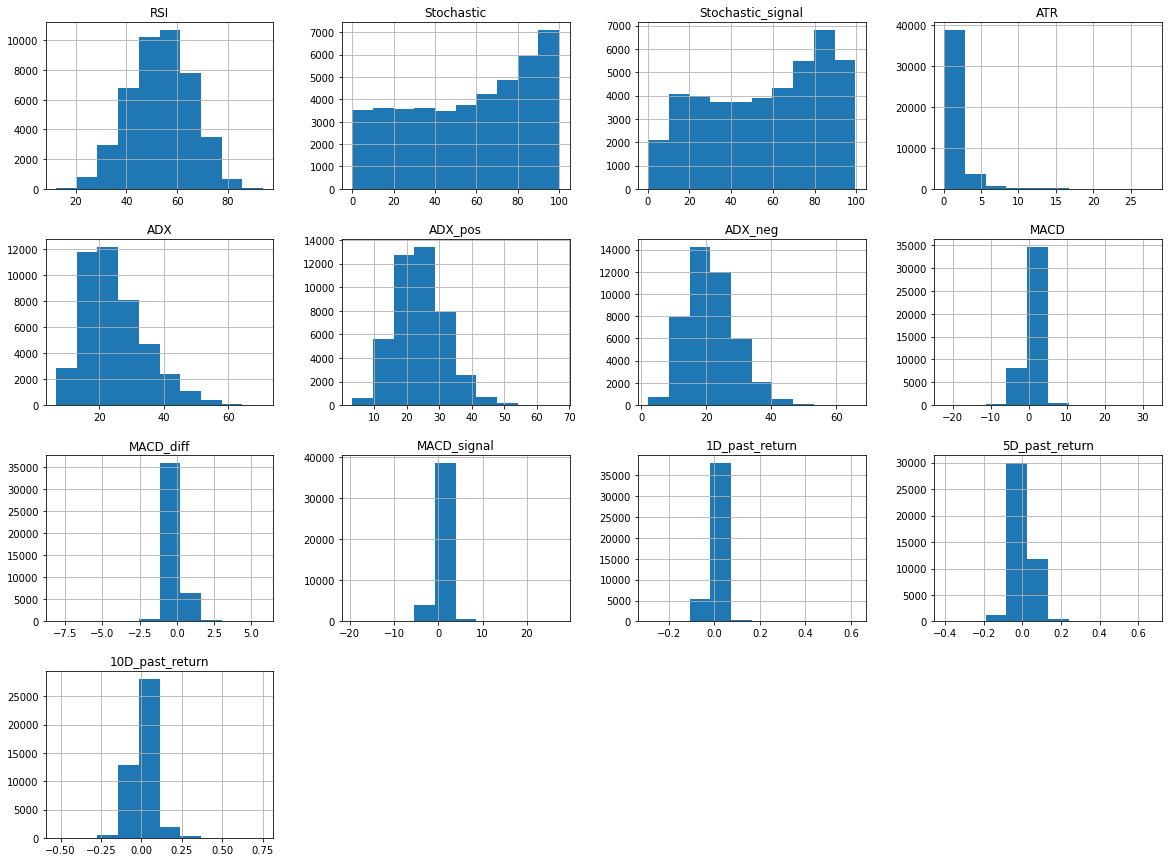

In [110]:
joined_df[INPUT_COLS].hist(figsize=(20, 15))
plt.show()

In [111]:

TARGET_COLS=['10D_return_bin']
outlier_validation={'1D_past_return': [-0.4, 0.4]}

stride = 1


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=True, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='2Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)

print('')
print('')
print('### Validation ###')
# 
# print('google_train', len(google_train)/stride)
# print('google_test', len(google_test)/stride)
# print('amazon_train', len(amazon_train)/stride)
# print('amazon_test', len(amazon_test)/stride)

# print('all trains sets', (len(apple_train) + len(google_train) + len(amazon_train))/stride)
# print('all tests sets', (len(apple_test) + len(google_test) + len(amazon_test))/stride)



15 Companies in Dataset
Starting CHKP: Company 1 of 15
Starting SBUX: Company 2 of 15
Starting VRTX: Company 3 of 15
Starting WDC: Company 4 of 15
Starting LBTYK: Company 5 of 15
Starting JD: Company 6 of 15
Starting EXPE: Company 7 of 15
Starting TTWO: Company 8 of 15
Starting HA: Company 9 of 15
Starting NVDA: Company 10 of 15
Starting ROST: Company 11 of 15
Starting AAPL: Company 12 of 15
Starting LBTYA: Company 13 of 15
Starting PAYX: Company 14 of 15
Starting EBAY: Company 15 of 15
All Companies Completed

Processing Stats: {'CHKP': {'train_possible_windows': 2500.0, 'train_outliers': 29, 'train_windows': 2471, 'test_possible_windows': 500.0, 'test_outliers': 29, 'test_windows': 471}, 'SBUX': {'train_possible_windows': 2500.0, 'train_outliers': 29, 'train_windows': 2471, 'test_possible_windows': 500.0, 'test_outliers': 29, 'test_windows': 471}, 'VRTX': {'train_possible_windows': 2500.0, 'train_outliers': 119, 'train_windows': 2381, 'test_possible_windows': 500.0, 'test_outliers': 

In [112]:
train_y.shape

(35603, 1)

In [113]:
train_x.shape

(35603, 30, 13)

In [114]:
import random

indx = list(range(len(train_x)))
sample_indx = random.sample(indx, 10000)
X_train_sample =  train_x[[sample_indx], :][0]
y_train_sample = train_y[[sample_indx]]

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [115]:
y_train_sample.shape

(10000, 1)

In [130]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax

optim = Adamax(learning_rate=0.0001)
precision = Precision()

def init_model():
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(30,13), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [ ]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=4,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/500
7121/7121 [==============================] - 91s 13ms/step - loss: 1.8062 - precision_10: 0.5620 - accuracy: 0.5615 - val_loss: 1.0025 - val_precision_10: 0.5621 - val_accuracy: 0.5621
Epoch 2/500
7121/7121 [==============================] - 94s 13ms/step - loss: 0.8061 - precision_10: 0.5620 - accuracy: 0.5620 - val_loss: 0.7170 - val_precision_10: 0.5621 - val_accuracy: 0.5621
Epoch 3/500
7121/7121 [==============================] - 73s 10ms/step - loss: 0.7019 - precision_10: 0.5620 - accuracy: 0.5620 - val_loss: 0.6939 - val_precision_10: 0.5621 - val_accuracy: 0.5621
Epoch 4/500
7121/7121 [==============================] - 101s 14ms/step - loss: 0.6909 - precision_10: 0.5620 - accuracy: 0.5620 - val_loss: 0.6890 - val_precision_10: 0.5621 - val_accuracy: 0.5621
Epoch 5/500
7121/7121 [==============================] - 79s 11ms/step - loss: 0.6878 - precision_10: 0.5620 - accuracy: 0.5620 - val_loss: 0.6864 - val_precision_10: 0.5621 - val_accuracy: 0.5621
Epoch 6/500
71

In [127]:
train_y.sum()/len(train_y)

0.5620593770187906

In [128]:
test_y.sum()/len(test_y)

0.5900920028308564

In [129]:
model.evaluate(test_x, test_y)

221/221 [==============================] - 1s 5ms/step - loss: 0.4333 - precision_9: 0.8843 - accuracy: 0.8300


[0.4333150088787079, 0.8842568397521973, 0.8300070762634277]